In [1]:
# Importing necessary librarires for the analysis

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset

df = pd.read_csv(r'E:\Ahsan Habib Sunny\DS Study Materials\Trisemester_1\MLDM\MLDM Assignments\marketing_campaign.csv',sep="\t")

# Top 5 rows of the dataset

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
# these variable has been dropped as there is no description of these columns
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis = 1)

In [5]:
# Let's change the columns name in small letter

df.columns = df.columns.str.lower()

In [6]:
# checking missing values

df.isnull().sum()

id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
response                0
dtype: int64

In [7]:
# dropping the missing values
# as the number of missing values is quite low, I decided to dropping them off
# if the number of missing values would be large, I would use to replace them by mean/median/mode values

df.dropna(inplace = True)

# Exploratory Data Analysis (EDA)

In [8]:
# Summary of the data (Only Numerical Variables)

df.describe()

,id,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# let's convert the 'dt_customer' column into datetime 

df["dt_customer"] = pd.to_datetime(df["dt_customer"],format = "%d-%m-%Y")

In [10]:
# Let's introduce another variable 'age'

from datetime import datetime
df['age'] = datetime.now().year - df['year_birth']
df['age']

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: age, Length: 2216, dtype: int64

In [11]:
# Checking number of unique categories of "marital_status"

df['marital_status'].value_counts()  

marital_status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [12]:
df['marital_status'] = df['marital_status'].replace(['Married', 'Together'],'In a Relationship')
df['marital_status'] = df['marital_status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

df['marital_status'].value_counts()

marital_status
In a Relationship    1430
Single                786
Name: count, dtype: int64

In the above cell, I've grouoped the 'Married' and 'Together' as "In a Relationship" whereas 'Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd' considered as "Single"

In [13]:
# Combining different variables into a single variable to reduce the number of dimension

df['childrens'] = df['kidhome'] + df['teenhome']
df['expenses'] = df['mntwines'] + df['mntfruits'] + df['mntmeatproducts'] + df['mntfishproducts'] + df['mntsweetproducts'] + df['mntgoldprods']
df['total_accepted_campaign'] = df['acceptedcmp1'] + df['acceptedcmp2'] + df['acceptedcmp3'] + df['acceptedcmp4'] + df['acceptedcmp5'] + df['response']
df['total_purchases'] = df['numwebpurchases'] + df['numcatalogpurchases'] + df['numstorepurchases'] + df['numdealspurchases']

In [14]:
# Delete those extra columns which we merged to create our new features to reduce number of dimensions

col_del = ["kidhome" , "teenhome", "mntwines" , "mntfruits","mntmeatproducts", "mntfishproducts","mntsweetproducts", "mntgoldprods","acceptedcmp1","acceptedcmp2","acceptedcmp3" , "acceptedcmp4", "acceptedcmp5","response", "numwebpurchases", "numcatalogpurchases", "numstorepurchases", "numdealspurchases"]
df=df.drop(columns=col_del,axis=1)
df.head()

,id,year_birth,education,marital_status,income,dt_customer,recency,numwebvisitsmonth,complain,age,childrens,expenses,total_accepted_campaign,total_purchases
0,5524,1957,Graduation,Single,58138.0,2012-09-04,58,7,0,66,0,1617,1,25
1,2174,1954,Graduation,Single,46344.0,2014-03-08,38,5,0,69,2,27,0,6
2,4141,1965,Graduation,In a Relationship,71613.0,2013-08-21,26,4,0,58,0,776,0,21
3,6182,1984,Graduation,In a Relationship,26646.0,2014-02-10,26,6,0,39,1,53,0,8
4,5324,1981,PhD,In a Relationship,58293.0,2014-01-19,94,5,0,42,1,422,0,19


In [15]:
# let's check the 'education' feature

df['education'].value_counts()

education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

There are multiple categories. So, I chose to convert those into only two categories.

In [16]:
df['education'] = df['education'].replace(['Basic','2n Cycle','Graduation'], 'Undergraduate')
df['education'] = df['education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Postgraduate')  

df['education'].value_counts()

education
Undergraduate    1370
Postgraduate      846
Name: count, dtype: int64

# Let's do some visualization

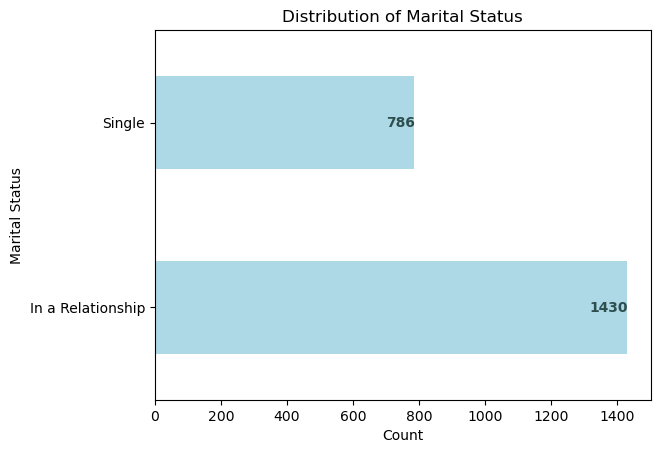

In [17]:
# Bar graph of Marital Status

sns.set_palette("viridis")
ax = df['marital_status'].value_counts().plot(kind='barh', color='lightblue')  # Adjust bar color
ax.set_xlabel("Count")
ax.set_ylabel("Marital Status")
ax.set_title("Distribution of Marital Status")

for index, value in enumerate(df['marital_status'].value_counts()):
    ax.text(value + 1, index, f"{value}", ha='right', va='center', color='darkslategray', fontweight='bold', fontsize=10)  # Adjusted font size

plt.show()

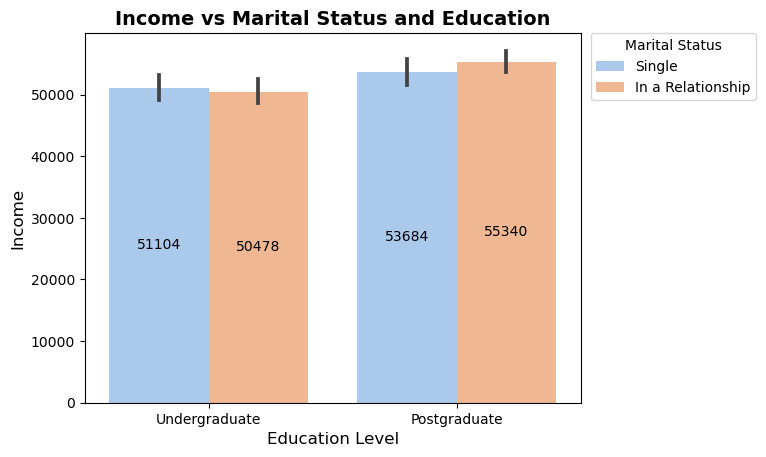

In [18]:
# Bar plot of Income vs Marital Status and Education
sns.set_palette("pastel")
ax = sns.barplot(x='education', y='income', hue='marital_status', data=df)
ax.set_xlabel("Education Level", fontsize=12)
ax.set_ylabel("Income", fontsize=12)
ax.set_title("Income vs Marital Status and Education", fontsize=14, fontweight='bold')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='center', fontsize=10, color='black')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Marital Status")
plt.xticks(rotation=0, ha='center')
plt.show()


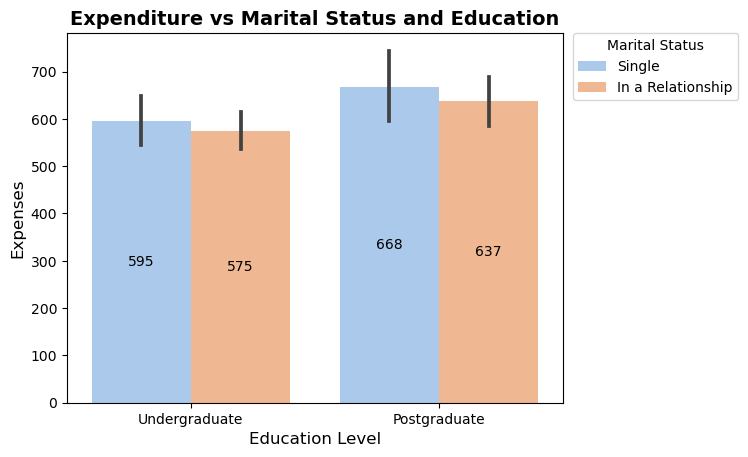

In [19]:
# Bar plot of Expenses vs Education and Marital Status
sns.set_palette("pastel")
ax = sns.barplot(x='education', y='expenses', hue='marital_status', data=df)
ax.set_xlabel("Education Level", fontsize=12)
ax.set_ylabel("Expenses", fontsize=12)
ax.set_title("Expenditure vs Marital Status and Education", fontsize=14, fontweight='bold')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='center', fontsize=10, color='black')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Marital Status")
plt.xticks(rotation=0, ha='center')
plt.show()

In [20]:
df.head()

,id,year_birth,education,marital_status,income,dt_customer,recency,numwebvisitsmonth,complain,age,childrens,expenses,total_accepted_campaign,total_purchases
0,5524,1957,Undergraduate,Single,58138.0,2012-09-04,58,7,0,66,0,1617,1,25
1,2174,1954,Undergraduate,Single,46344.0,2014-03-08,38,5,0,69,2,27,0,6
2,4141,1965,Undergraduate,In a Relationship,71613.0,2013-08-21,26,4,0,58,0,776,0,21
3,6182,1984,Undergraduate,In a Relationship,26646.0,2014-02-10,26,6,0,39,1,53,0,8
4,5324,1981,Postgraduate,In a Relationship,58293.0,2014-01-19,94,5,0,42,1,422,0,19


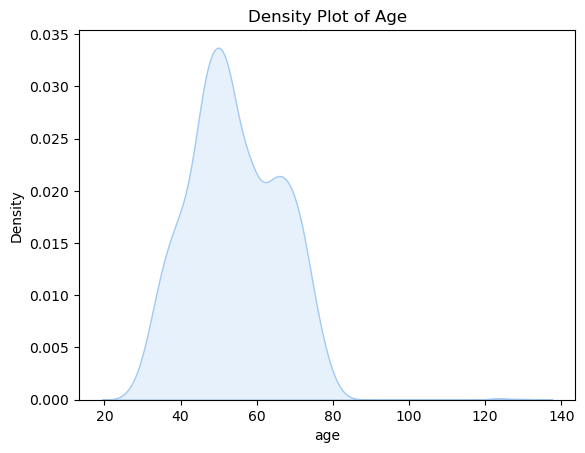

In [21]:
# let's check the distribution of age column

sns.kdeplot(df['age'], shade=True)
plt.title('Density Plot of Age')
plt.show()

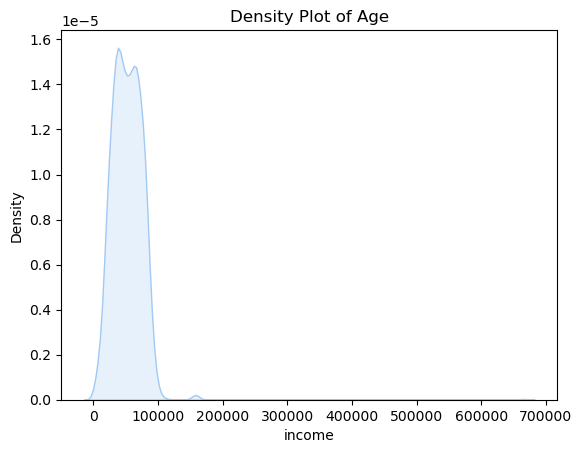

In [22]:
# let's check the distribution of income column

sns.kdeplot(df['income'], shade=True)
plt.title('Density Plot of Age')
plt.show()

In [23]:
# Remove outliers from the dataset

def remove_outliers(dataframe, col):
    q1, q3 = np.nanpercentile(dataframe[col], [25, 75])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    dataframe = dataframe[(dataframe[col] > lower_bound) & (dataframe[col] < upper_bound)]

    return dataframe

df = remove_outliers(df, 'age')
df = remove_outliers(df, 'income')
df = remove_outliers(df,'expenses')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2202 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2202 non-null   int64         
 1   year_birth               2202 non-null   int64         
 2   education                2202 non-null   object        
 3   marital_status           2202 non-null   object        
 4   income                   2202 non-null   float64       
 5   dt_customer              2202 non-null   datetime64[ns]
 6   recency                  2202 non-null   int64         
 7   numwebvisitsmonth        2202 non-null   int64         
 8   complain                 2202 non-null   int64         
 9   age                      2202 non-null   int64         
 10  childrens                2202 non-null   int64         
 11  expenses                 2202 non-null   int64         
 12  total_accepted_campaign  2202 non-null 

In [25]:
# let's just take the essential features of the further analysis and model implementation

new_df = df[['education','marital_status','age','income','expenses','childrens','numwebvisitsmonth',
                  'total_accepted_campaign','total_purchases']]

new_df.head()

,education,marital_status,age,income,expenses,childrens,numwebvisitsmonth,total_accepted_campaign,total_purchases
0,Undergraduate,Single,66,58138.0,1617,0,7,1,25
1,Undergraduate,Single,69,46344.0,27,2,5,0,6
2,Undergraduate,In a Relationship,58,71613.0,776,0,4,0,21
3,Undergraduate,In a Relationship,39,26646.0,53,1,6,0,8
4,Postgraduate,In a Relationship,42,58293.0,422,1,5,0,19


In [26]:
# let's separate the categorical variables

df_cat_vars = new_df[['education','marital_status']]

# Encoding the categorical variables using LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_cat_vars = df_cat_vars.apply(le.fit_transform)
df_cat_vars.head()

,education,marital_status
0,1,1
1,1,1
2,1,0
3,1,0
4,0,0


In [27]:
# Scaling the numerical column of the dataset

from sklearn.preprocessing import StandardScaler

df_num_vars = new_df.drop(['education','marital_status'], axis = 1)

ss = StandardScaler() # Standardization

df_num_vars['income'] = ss.fit_transform(df_num_vars[['income']])
df_num_vars['numwebvisitsmonth'] = ss.fit_transform(df_num_vars[['numwebvisitsmonth']])
df_num_vars['age'] = ss.fit_transform(df_num_vars[['age']])
df_num_vars['childrens'] = ss.fit_transform(df_num_vars[['childrens']])
df_num_vars['expenses'] = ss.fit_transform(df_num_vars[['expenses']])
df_num_vars['total_accepted_campaign'] = ss.fit_transform(df_num_vars[['total_accepted_campaign']])
df_num_vars['total_purchases'] = ss.fit_transform(df_num_vars[['total_purchases']])

In [28]:
# Let's merge the encoded categorical variables with other existing numerical variables

final_df = pd.concat([df_num_vars, df_cat_vars], axis = 1)
final_df

,age,income,expenses,childrens,numwebvisitsmonth,total_accepted_campaign,total_purchases,education,marital_status
0,1.016304,0.317669,1.694294,-1.268839,0.687909,0.620071,1.329607,1,1
1,1.273043,-0.252786,-0.965610,1.402274,-0.141650,-0.502788,-1.166382,1,1
2,0.331669,0.969430,0.287389,-1.268839,-0.556430,-0.502788,0.804136,1,0
3,-1.294340,-1.205543,-0.922115,0.066717,0.273129,-0.502788,-0.903646,1,0
4,-1.037602,0.325166,-0.304816,0.066717,-0.141650,-0.502788,0.541400,0,0
...,...,...,...,...,...,...,...,...,...
2235,0.160510,0.466884,1.232575,0.066717,-0.141650,-0.502788,0.410032,1,0
2236,1.957678,0.601880,-0.268013,2.737830,0.687909,0.620071,0.935504,0,0
2237,-1.037602,0.261707,1.065285,-1.268839,0.273129,0.620071,0.541400,1,1
2238,1.101884,0.854894,0.399473,0.066717,-0.971210,-0.502788,1.066872,0,0


<Axes: >

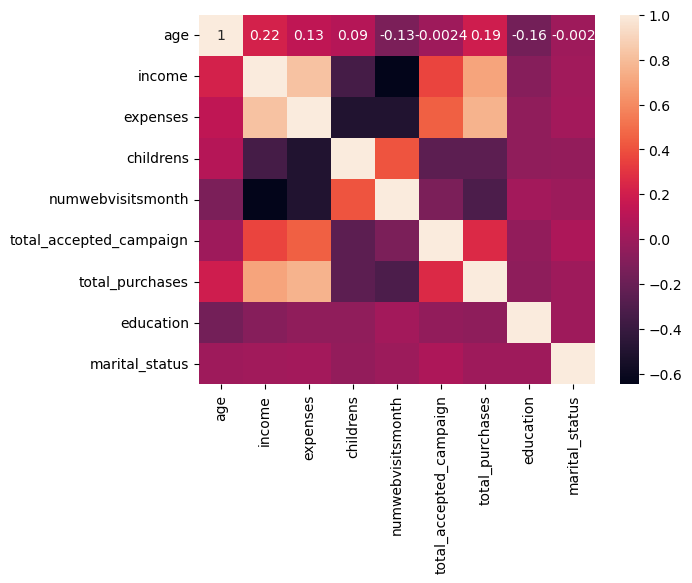

In [29]:
# let's check the correlation matrix

sns.heatmap(final_df.corr(), annot=True)

# Dimensionality Reduction

In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.


In [30]:
#Initiating PCA to reduce dimentions aka features to 3

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(final_df)
PCA_df = pd.DataFrame(pca.transform(final_df), columns=(["col1","col2", "col3"]))
PCA_df.describe().T


,count,mean,std,min,25%,50%,75%,max
col1,2202.0,2.581445e-17,1.841995,-4.616239,-1.646447,-0.352547,1.499675,5.016161
col2,2202.0,-5.001550e-17,1.068471,-3.030891,-0.815997,-0.021419,0.758462,3.209619
col3,2202.0,6.453612e-18,0.951894,-1.922556,-0.598120,-0.089762,0.493442,4.134588


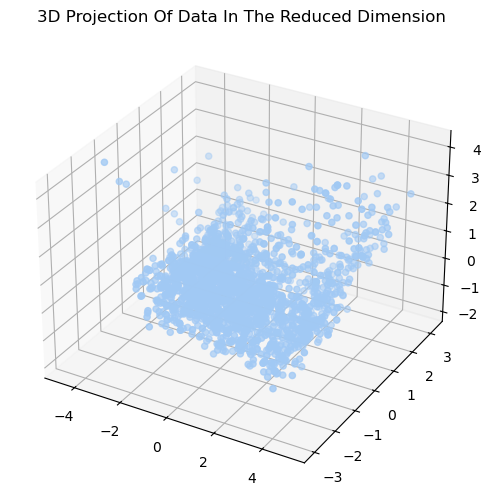

In [31]:
#A 3D Projection Of Data In The Reduced Dimension
x = PCA_df["col1"]
y = PCA_df["col2"]
z = PCA_df["col3"]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x,y,z, marker="o")
ax.set_title("3D Projection Of Data In The Reduced Dimension")
plt.show()

# Model Implementation

## K-means clustering

Text(0, 0.5, 'Within cluster Sum of Squared')

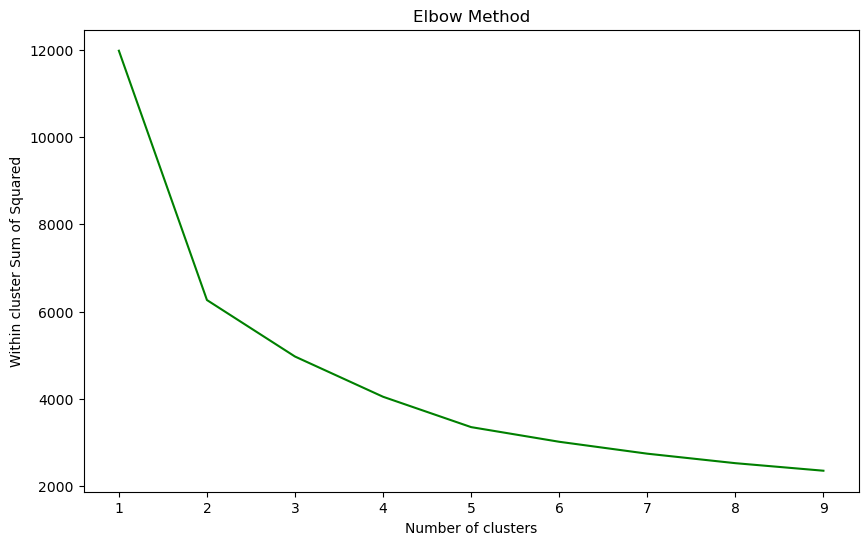

In [32]:
# Elbow method

from sklearn.cluster import KMeans

wcss=[]
for i in range (1,10):
 kmeans=KMeans(n_clusters=i, init='k-means++', random_state = 695121)
 kmeans.fit(PCA_df)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,10),wcss, 'g-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster Sum of Squared')


From the above plot, it can be seen that the within sum of squared distances slows down when the number of cluster 3. 

In [33]:
# Training the dataset using using K-Means Algorithm and predict the clusters

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 695121)
predicted_clusters = kmeans.fit_predict(PCA_df)

# Appending those cluster value into PCA_df and main dataframe "new_df" (without label encodera and standard-scalar)

# PCA_df['cluster'] = predicted_clusters + 1

new_df_1 = new_df.copy()
new_df_1['cluster'] = predicted_clusters + 1
new_df_1['cluster'] = new_df_1['cluster'].astype(str)


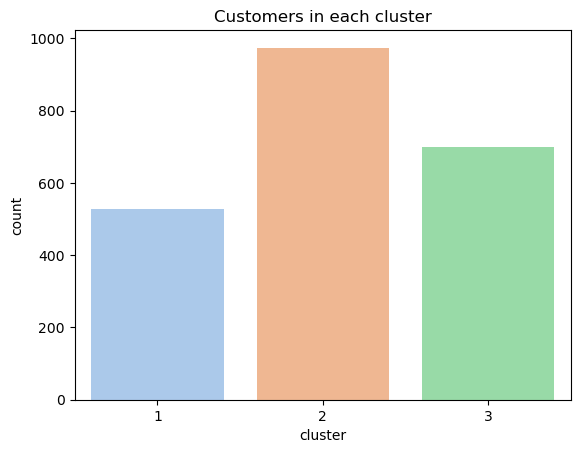

In [34]:
# let's plot a countplot to get a idea of the frequency in each of the cluster

sns.countplot(x = new_df_1["cluster"]).set(title='Customers in each cluster')
plt.show()

Here, it can be seen that most of the customers have been placed into cluster 2, followed by cluster 3 and cluster 1.

#### Interpretation of Cluster

<Axes: xlabel='cluster', ylabel='income'>

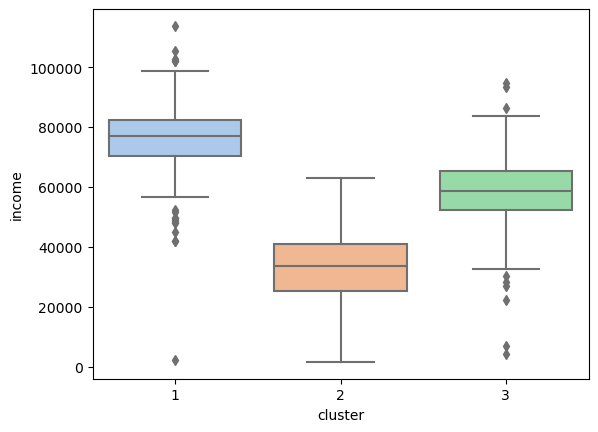

In [35]:
# boxplot of income vs cluster

sns.boxplot(x='cluster', y='income', data = new_df_1)

Cluster based on Income:
1. cluster 1: High income group with average(median) income of approximately 80,000
2. cluster 2: Low income group with average(median) income of approximately 35,000
3. cluster 3: Medium income group with average(median) income of approximately 60,000

<Axes: xlabel='cluster', ylabel='expenses'>

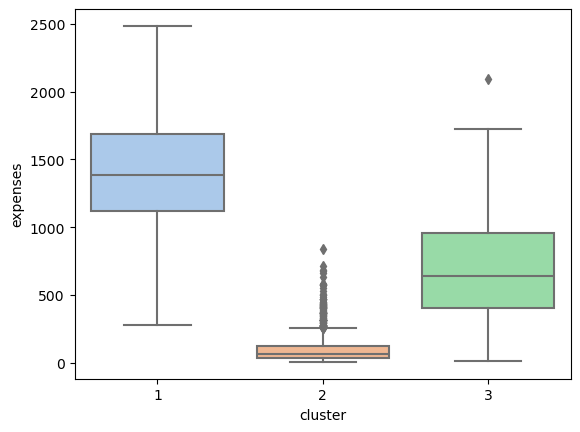

In [36]:
# boxplot of expenses vs cluster
sns.boxplot(x='cluster', y='expenses', data=new_df_1)

Cluster based on Expenditure:
1. cluster 1: High expenditure group with average(median) expenses of approximately 1,400
2. cluster 2: Low expenditure group
3. cluster 3: Medium expenditure group with average(median) expenses of approximately 800

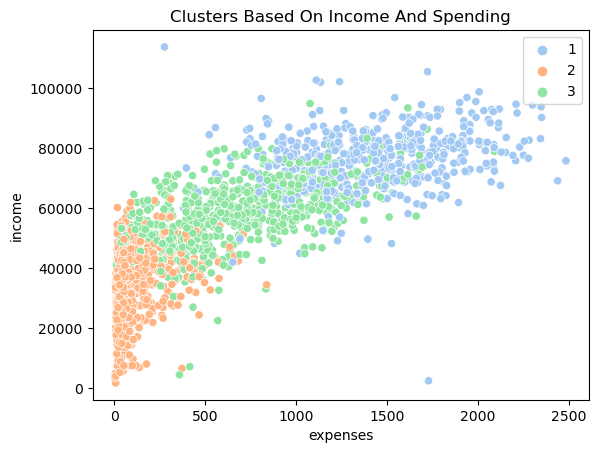

In [37]:
# clusters based on Income and Expenditure

sns.scatterplot(data = new_df_1,x = new_df_1["expenses"], y = new_df_1["income"],
                hue = new_df_1["cluster"]).set(title = "Clusters Based On Income And Spending")
                                  
plt.legend()
plt.show()

Income vs Expenditure plot shows the clusters pattern:

1. cluster 1: High income (average 80,000 approx.) & High expenses (average 1400 approx.)
2. cluster 2: Low income (avergae 35,000 approx.) & Low expenses 
3. cluster 3: Medium income (average 60,000 approx.) & Medium expenses (average 800 approx.)

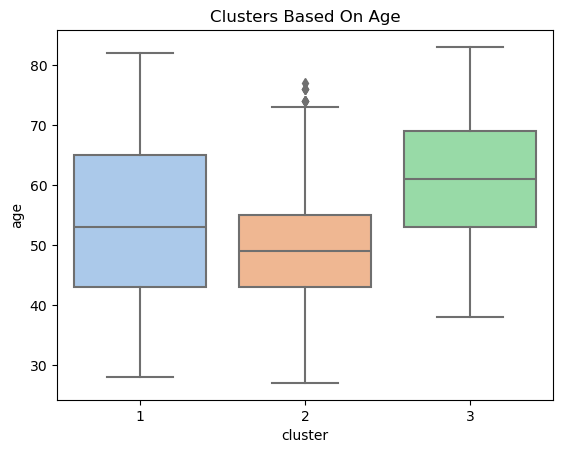

In [38]:
# clusters based on Age

sns.boxplot(x='cluster', y='age', data=new_df_1).set(title = "Clusters Based On Age")
plt.show()

Cluster based on Age:
1. cluster 1: customers who have an average(median) age of 53 (approx.)
2. cluster 2: customers who have an average(median) age of 50 (approx.)
3. cluster 3: customers who have an average(median) age of approximately 60

<Axes: xlabel='total_accepted_campaign', ylabel='count'>

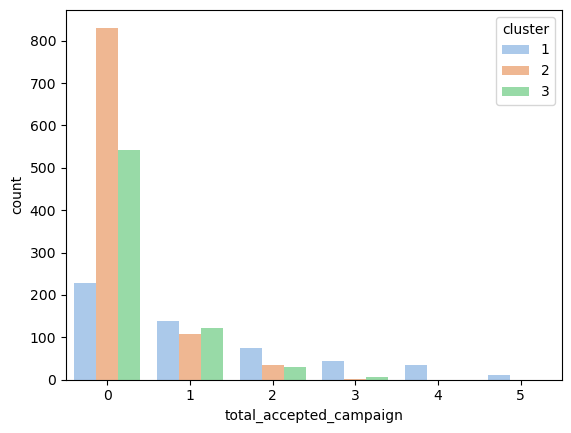

In [39]:
# Plotting count of total campaign accepted

sns.countplot(x = new_df_1["total_accepted_campaign"], 
              hue = new_df_1["cluster"])

There has not been an fascinating response to the campaigns so far. A large portions of customers of all the 3 clusters did not take part take at all. Well-planned campaigns are required to boost sales.

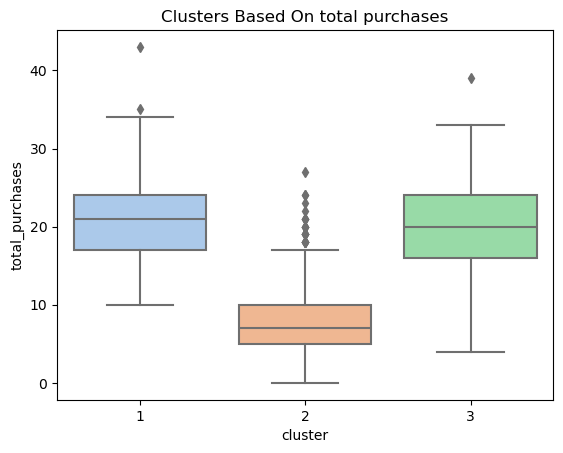

In [40]:
# Plotting count of total purchases by cluster

sns.boxplot(x='cluster', y='total_purchases', data=new_df_1).set(title = "Clusters Based On total purchases")
plt.show()

Cluster based on Total Purchases:
1. cluster 1: customers with highest number (average of approximately 22) of total purchases
2. cluster 2: customers with average of approximately 8 total purchases
3. cluster 3: customers with average of approximately 20 total purchases

In [41]:
# cluster wise childrens distribution

new_df_1.groupby('cluster')['childrens'].value_counts()

cluster  childrens
1        0            454
         1             73
         2              2
2        1            556
         2            269
         0            116
         3             33
3        1            483
         2            144
         0             55
         3             17
Name: count, dtype: int64

1. Cluster 1: most of the customers have no children.
2. Cluster 2: most of the customers have only 1 children.
3. Cluster 3: most of the customers have only 1 children.

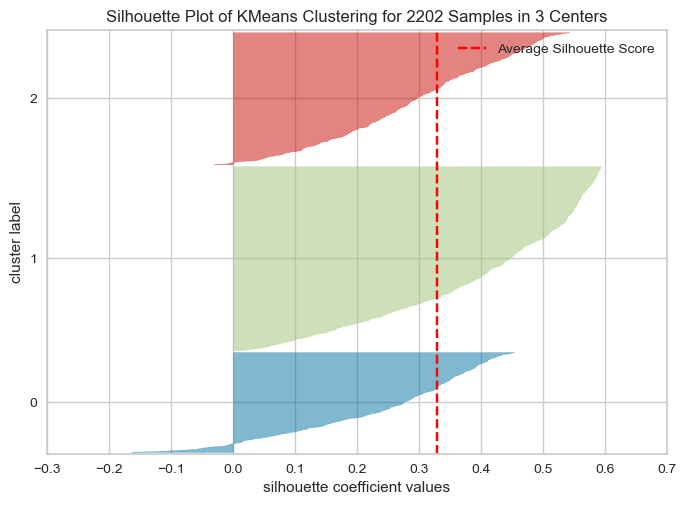

In [42]:
# To check quality of each cluster we can examine Silhouette Score

# !pip install yellowbrick -- if installation needed then run the code

from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(PCA_df)
visualizer.show()
plt.show()

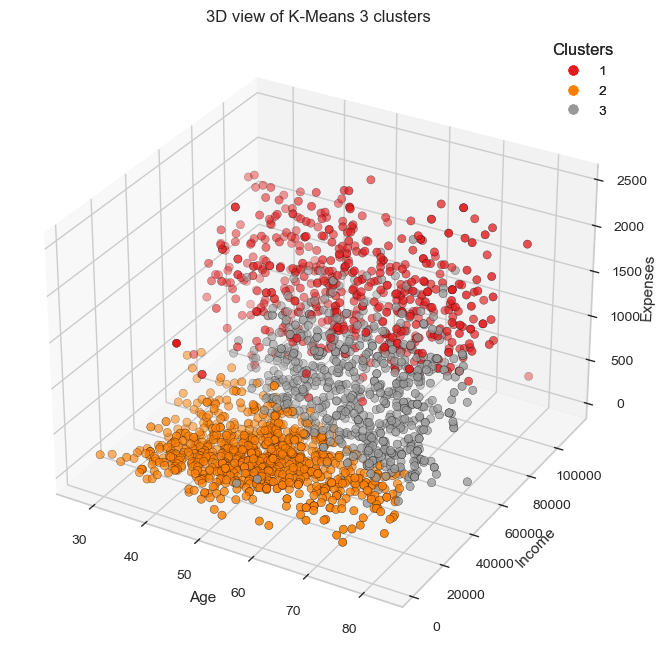

In [43]:
# 3D plot of clusters
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(new_df_1['age'], new_df_1['income'], new_df_1['expenses'],
                     c=new_df_1['cluster'].astype('int'), s=35,
                     edgecolor='k', cmap=plt.cm.Set1)
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Expenses')
ax.set_title('3D view of K-Means 3 clusters')
legend = ax.legend(*scatter.legend_elements(), title="Clusters", loc='upper right')
ax.add_artist(legend)

plt.show()

### As a result of K-means cluster analysis, we received three groups of buyers (clusters):

#### Cluster 1: 
1. High income group with average(median) income of approximately 80,000.
2. High expenditure group with average(median) of 1400.
3. Average age is 53 years.
4. Average number of total purchases is 22.
5. Most of the customers have no children.

#### Cluster 2: 
1. Low income group with average(median) income of approximately 35,000.
2. Low expenditure group.
3. Average age is 50 years.
4. Avergae number total of purchases is 8.
5. Most of the customers have only 1 children.

#### Cluster 3: 
1. Medium income group with average(median) income of approximately 60,000.
2. High expenditure group with average(median) of 800.
3. Average age is 60 years.
4. Average number of total purchases is 20.
5. Most of the customers have 1 children.


# Agglomerative Clustering model

In [44]:
# Agglomerative Clustering model
from sklearn.cluster import AgglomerativeClustering

AC = AgglomerativeClustering(n_clusters = 3)

# fit model and predict clusters
predicted_cluster_2 = AC.fit_predict(PCA_df)

# add to the dataframe
new_df_2 = new_df.copy() 
new_df_2["cluster"] = predicted_cluster_2 + 1
new_df_2['cluster'] = new_df_2['cluster'].astype(str)
new_df_2.head()


,education,marital_status,age,income,expenses,childrens,numwebvisitsmonth,total_accepted_campaign,total_purchases,cluster
0,Undergraduate,Single,66,58138.0,1617,0,7,1,25,1
1,Undergraduate,Single,69,46344.0,27,2,5,0,6,2
2,Undergraduate,In a Relationship,58,71613.0,776,0,4,0,21,1
3,Undergraduate,In a Relationship,39,26646.0,53,1,6,0,8,3
4,Postgraduate,In a Relationship,42,58293.0,422,1,5,0,19,2


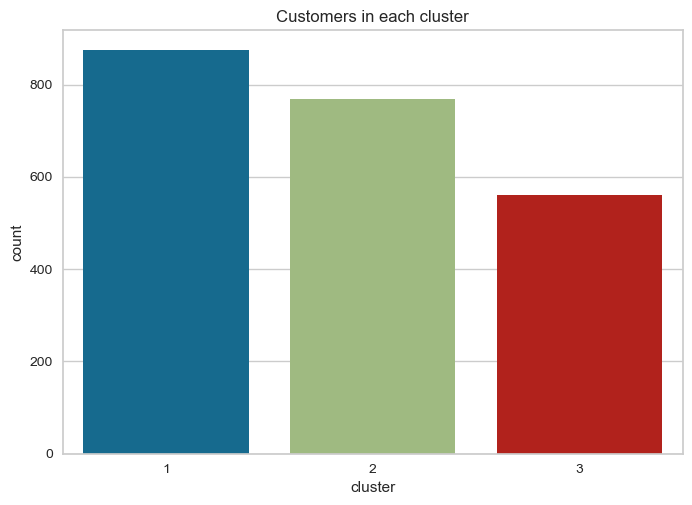

In [45]:
# let's plot a countplot to get a idea of the frequency in each of the cluster

sns.countplot(x = new_df_2["cluster"]).set(title='Customers in each cluster')
plt.show()

Here, the cluster 1 has larger observations than cluster 2 and cluster 3.

<Axes: xlabel='cluster', ylabel='income'>

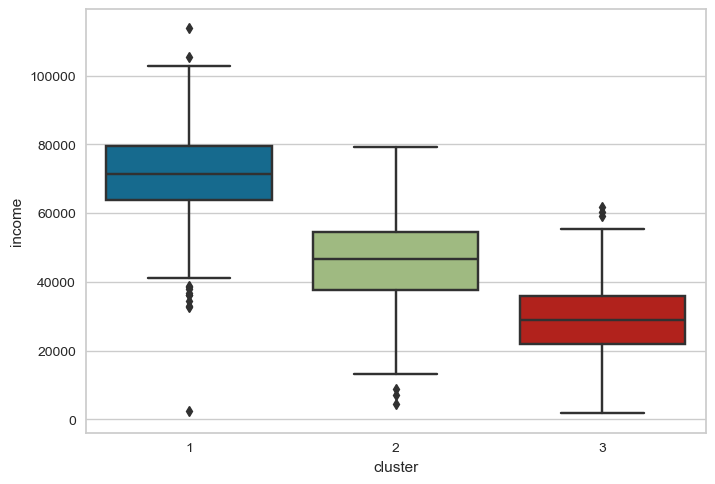

In [46]:
# boxplot of income vs cluster

sns.boxplot(x='cluster', y='income', data = new_df_2)

Cluster based on Income:
1. cluster 1: High income group with average(median) income more than 70,000
2. cluster 2: Medium income group with average(median) income of approximately 50,000
3. cluster 3: Low income group with average(median) income of approximately 30,000

<Axes: xlabel='cluster', ylabel='expenses'>

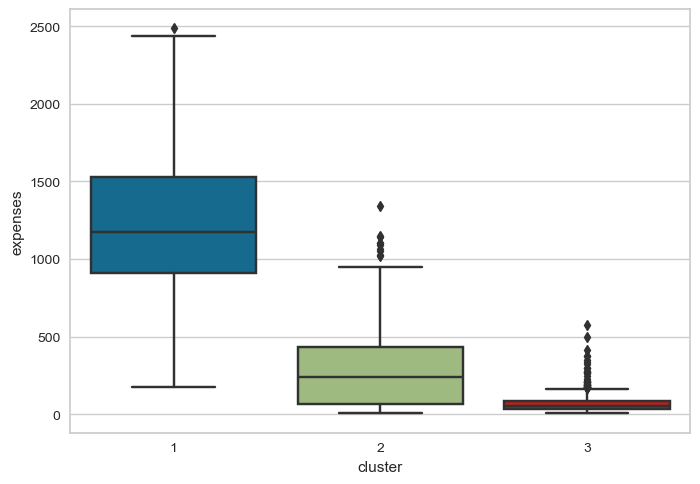

In [47]:
# boxplot of expenses vs cluster

sns.boxplot(x='cluster', y='expenses', data = new_df_2)

Cluster based on Expense:
1. cluster 1: High expenditure group with average(median) expenses of approximately 1200
2. cluster 2: Medium expenditure group with average(median) expenses of approximately 250
3. cluster 3: Low expenditure group with average(median) expenses of approximately below 100


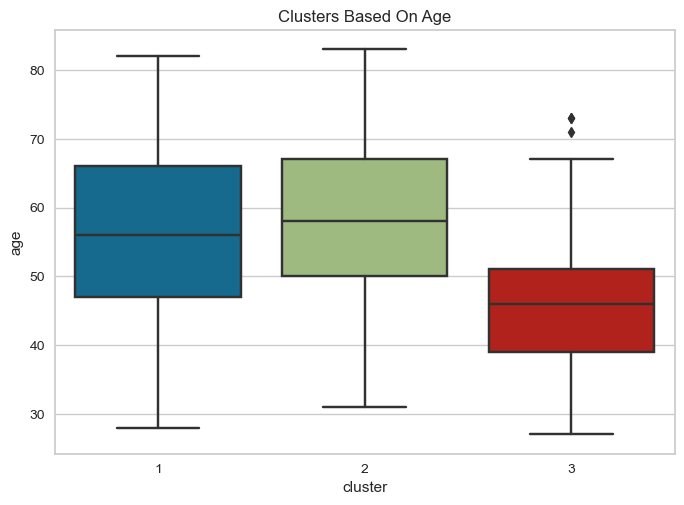

In [48]:
# clusters based on Age

sns.boxplot(x='cluster', y='age', data = new_df_2).set(title = "Clusters Based On Age")
plt.show()

Cluster based on Age:
1. cluster 1: Average age of the customers are around 56 years.
2. cluster 2: Average age of the customers are around 59 years.
3. cluster 3: Average age of the customers are around 47 years.

<Axes: xlabel='total_accepted_campaign', ylabel='count'>

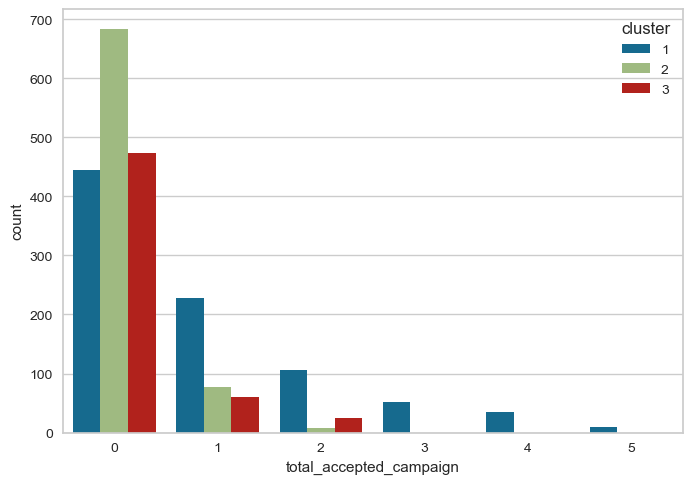

In [49]:
# Plotting count of total campaign accepted

sns.countplot(x = new_df_2["total_accepted_campaign"], 
              hue = new_df_2["cluster"])

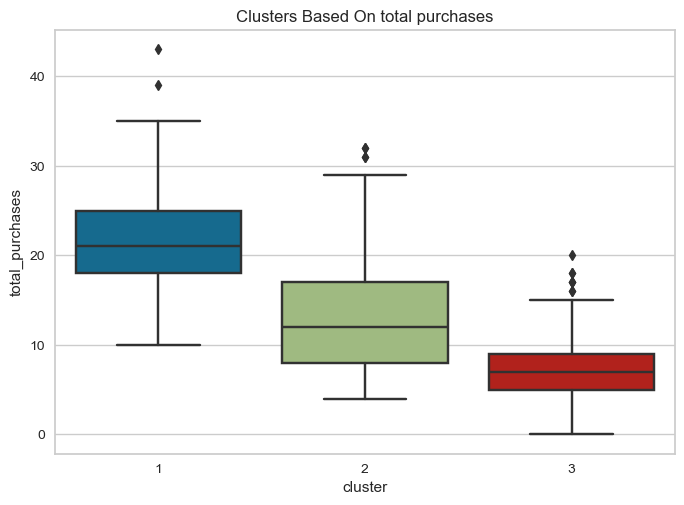

In [50]:
# Plotting count of total purchases by cluster

sns.boxplot(x='cluster', y='total_purchases', data=new_df_2).set(title = "Clusters Based On total purchases")
plt.show()

Cluster based on Total Purchases:
1. cluster 1: customers with highest number of total purchases (average of approximately 22)
2. cluster 2: customers with medium number of total purchases (average of 12 approximately)
3. cluster 3: customers with lowest number of total purchases (average of 8 approx.)

In [51]:
# cluster wise childrens distribution

new_df_2.groupby('cluster')['childrens'].value_counts()

cluster  childrens
1        0            479
         1            354
         2             33
         3              8
2        1            365
         2            288
         0             76
         3             39
3        1            393
         2             94
         0             70
         3              3
Name: count, dtype: int64

Cluster based on number of childrens:

1. cluster 1: most of the customers are having no children.
2. cluster 2: most of the customers are having one or two childrens.
3. cluster 3: most of the customers are having only one children.

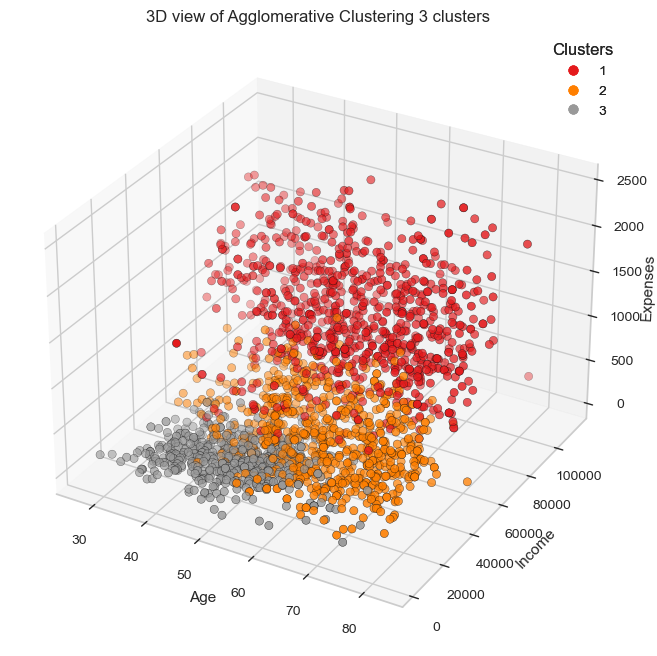

In [52]:
# 3D plot of clusters
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(new_df_2['age'], new_df_2['income'], 
                     new_df_2['expenses'], c=new_df_2['cluster'].astype('int'), 
                     s=35, edgecolor='k', cmap=plt.cm.Set1)
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Expenses')
ax.set_title('3D view of Agglomerative Clustering 3 clusters')
legend = ax.legend(*scatter.legend_elements(), title="Clusters", loc='upper right')
ax.add_artist(legend)

plt.show()

### As a result of Agglomerative Clustering clustering, we received three groups of buyers (clusters):

#### Cluster 1: 
1. High income group with average(median) income of approximately 70,000.
2. High expenditure group with average(median) of 1200.
3. Average age is 56 years.
4. Average number of total purchases is 22.
5. Most of the customers have no children.

#### Cluster 2: 
1. Medium income group with average(median) income of approximately 50,000.
2. Medium expenditure group with an average expenses of 250 (approx.).
3. Average age is 59 years.
4. Avergae number total of purchases is 12.
5. Most of the customers are with one or two children.

#### Cluster 3: 
1. Low income group with average(median) income of approximately 30,000.
2. Low expenditure group with an average of below 100.
3. Average age is 47 years.
4. Average number of total purchases is 8.
5. Most of the customers have only one children.

# Evaluation of models

In [53]:
# Silhouette scores measures how well defined the clusters are where a higher score depicts better defined clusters.

from sklearn.metrics import silhouette_score

silhouette_scores = []

# Apply different clustering algorithms
for model in [kmeans, AC]:
    labels = model.fit_predict(PCA_df)
    score = silhouette_score(PCA_df, labels)
    silhouette_scores.append(score)

In [54]:
print('Silhouette score of K-means algorithm is ', silhouette_scores[0])
print('Silhouette score of Agglomerative clustering algorithm is ', silhouette_scores[1])

Silhouette score of K-means algorithm is  0.32900250139020987
Silhouette score of Agglomerative clustering algorithm is  0.24272684637402842


In [55]:
# Calinski-Harabasz index (also known as the Variance Ratio Criterion) is a ratio of the sum of inter-cluster dispersion and the sum of intra-cluster dispersion for all clusters. 
# A high score means better clustering since observations in each cluster are closer together , while clusters themselves are further away from each other.

from sklearn.metrics import calinski_harabasz_score

ch_scores = []

# Apply different clustering algorithms
for model in [kmeans, AC]:
    labels = model.fit_predict(PCA_df)
    # Calinski-Harabasz index (also known as the Variance Ratio Criterion) is a ratio of the sum of inter-cluster dispersion and the sum of intra-cluster dispersion for all clusters. A high score means better clustering since observations in each cluster are closer together , while clusters themselves are further away from each other.
    score = calinski_harabasz_score(PCA_df, labels)
    ch_scores.append(score)

In [56]:
print('Calinski-Harabasz Index of K-means algorithm is ', ch_scores[0])
print('Calinski-Harabasz Index Agglomerative clustering algorithm is ', ch_scores[1])

Calinski-Harabasz Index of K-means algorithm is  1550.32521075623
Calinski-Harabasz Index Agglomerative clustering algorithm is  1242.6924923115826


### As the silhouette score and calinski-harabasz index score is better in K-means algorithm than Agglomerative clustering, it can be concluded that K-means algorithm works better in this data.